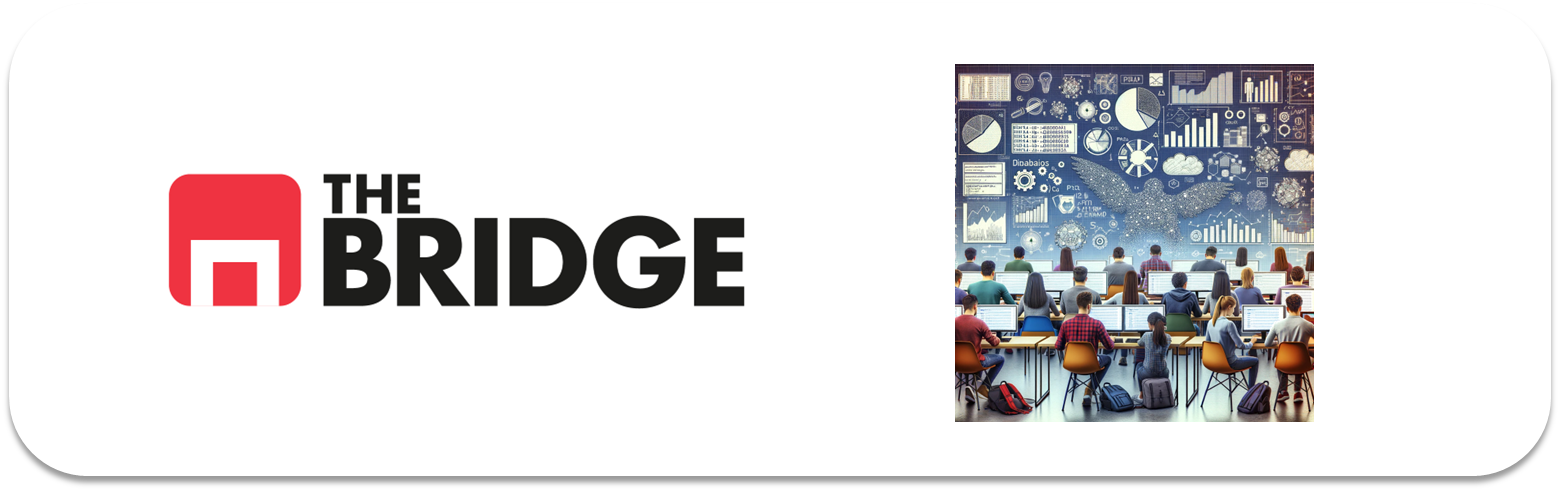

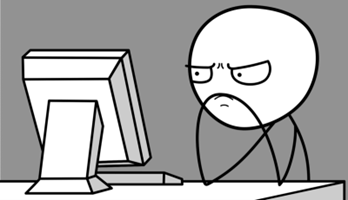

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [24]:
df_advert = pd.read_csv("./data/advertising_ml.csv")
df_advert.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23 años,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33 años,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48 años,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30 años,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20 años,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [25]:
# Supongamos que el dataset se llama df_advert
df_advert.info()
df_advert.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,83,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,31 years,NaN,NaN,Virtual 5thgeneration emulation,Lisamouth,NaN,Czech Republic,2016-06-03 21:43:21,NaN
freq,NaN,34,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,NaN,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,NaN,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,NaN,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,NaN,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,NaN,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,NaN,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


- "Age" tiene una mezcla de formatos ("años" y "years"), lo que puede requerir una unificación.
- "City" y "Country" tienen muchas categorías únicas, lo cual podría afectar el análisis si hay errores tipográficos.
- "Timestamp" es una variable de tiempo que puede ser útil si la convertimos a formato datetime.
- "Clicked on Ad" parece ser una variable binaria, probablemente indicando si la persona hizo clic en el anuncio o no.
Puedo limpiar:
- Unificar formatos en "Age".
- Convertir "Timestamp" a datetime para facilitar análisis temporales.
- Revisar "City" y "Country" en caso de nombres inconsistentes.
- Codificar "Male" en formato categórico (0 = Femenino, 1 = Masculino)


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

📌 Tipo de problema
Este es un problema de clasificación binaria, ya que queremos predecir si un usuario hará clic en el anuncio (1) o no (0). En términos de Machine Learning, estamos tratando con una variable de respuesta dicotómica (dos posibles valores).
📌 Tipo de aprendizaje
Este problema cae dentro del aprendizaje supervisado, porque tenemos datos etiquetados (sabemos qué usuarios han hecho clic y cuáles no). El modelo aprenderá a partir de ejemplos históricos con sus respectivas etiquetas y luego generalizará para predecir nuevos casos.
📌 Variable target
La variable objetivo es "Clicked on Ad", que indica si un usuario pulsó en el anuncio (1) o no lo hizo (0). Esta será la columna que el modelo intentará predecir en base a las demás características del dataset, como el tiempo en la web, ingresos, edad, uso de internet, etc.


### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

| **Columna**                    | **Definición** | **Cardinalidad** | **Tipo** |
|--------------------------------|---------------|----------------|----------|
| **Daily Time Spent on Site**   | Tiempo diario que un usuario pasa en el sitio web. | **1000** | **Numérica** (float) |
| **Age**                        | Edad del usuario en años. | **83** | **Numérica** (int) |
| **Area Income**                | Ingresos promedio en la zona del usuario. | **1000** | **Numérica** (float) |
| **Daily Internet Usage**       | Tiempo diario de uso de internet del usuario. | **1000** | **Numérica** (float) |
| **Ad Topic Line**              | Texto del anuncio mostrado al usuario. | **1000** | **Categórica** (string) |
| **City**                       | Ciudad de residencia del usuario. | **969** | **Categórica** (string) |
| **Male**                       | Género del usuario (1 = Hombre, 0 = Mujer). | **2** | **Categórica** (bool/int) |
| **Country**                    | País de residencia del usuario. | **237** | **Categórica** (string) |
| **Timestamp**                  | Momento en que el usuario vio el anuncio. | **1000** | **Categórica** (datetime) |
| **Clicked on Ad**              | Indica si el usuario hizo clic en el anuncio (1 = Sí, 0 = No). | **2** | **Categórica** (bool/int) |

### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [26]:
# Convertir 'Timestamp' a formato datetime
df_advert['Timestamp'] = pd.to_datetime(df_advert['Timestamp'])

# Limpiar 'Age' (extraer solo números si hay texto)
df_advert['Age'] = df_advert['Age'].astype(str).str.extract(r'(\d+)').astype(float)

# Convertir 'Male' a tipo categórico
df_advert['Male'] = df_advert['Male'].astype(bool)

# Normalizar nombres de ciudades y países (quitar espacios y ajustar mayúsculas)
df_advert['City'] = df_advert['City'].str.strip().str.title()
df_advert['Country'] = df_advert['Country'].str.strip().str.title()

# Eliminar duplicados
df_advert.drop_duplicates(inplace=True)

# Mostrar la información después de la limpieza
print(df_advert.info())
print(df_advert.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   float64       
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   bool          
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 71.4+ KB
None
   Daily Time Spent on Site   Age  Area Income  Daily 

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [27]:
# Definir la variable target y las características (X = variables predictoras, y = objetivo)
X = df_advert.drop(columns=['Clicked on Ad'])  # Eliminamos la columna target del conjunto de características
y = df_advert['Clicked on Ad']  # Definimos la variable objetivo

# Dividir el dataset en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento: 800 filas
Tamaño del conjunto de prueba: 200 filas


### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

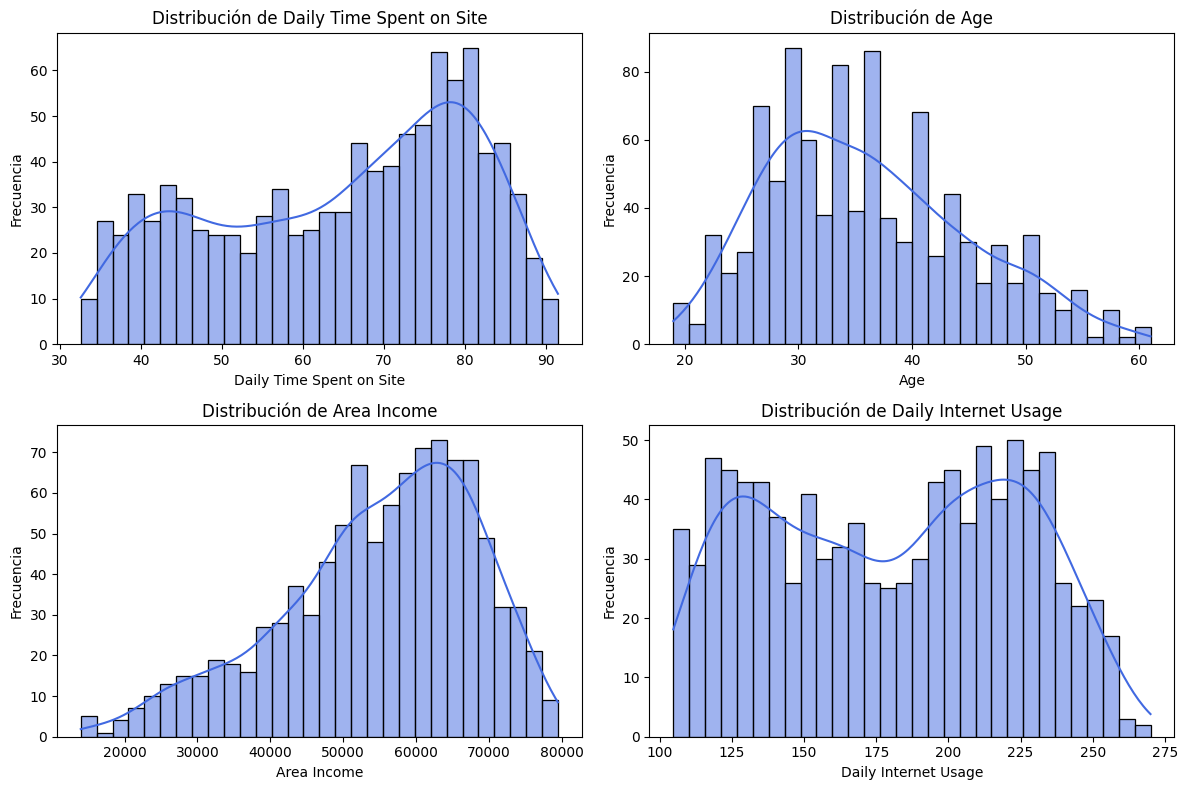

In [ ]:
# Definir las columnas numéricas
numeric_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Configurar tamaño de la figura
plt.figure(figsize=(12, 8))

# Generar histogramas para cada variable numérica
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_advert[col], bins=30, kde=True, color='royalblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

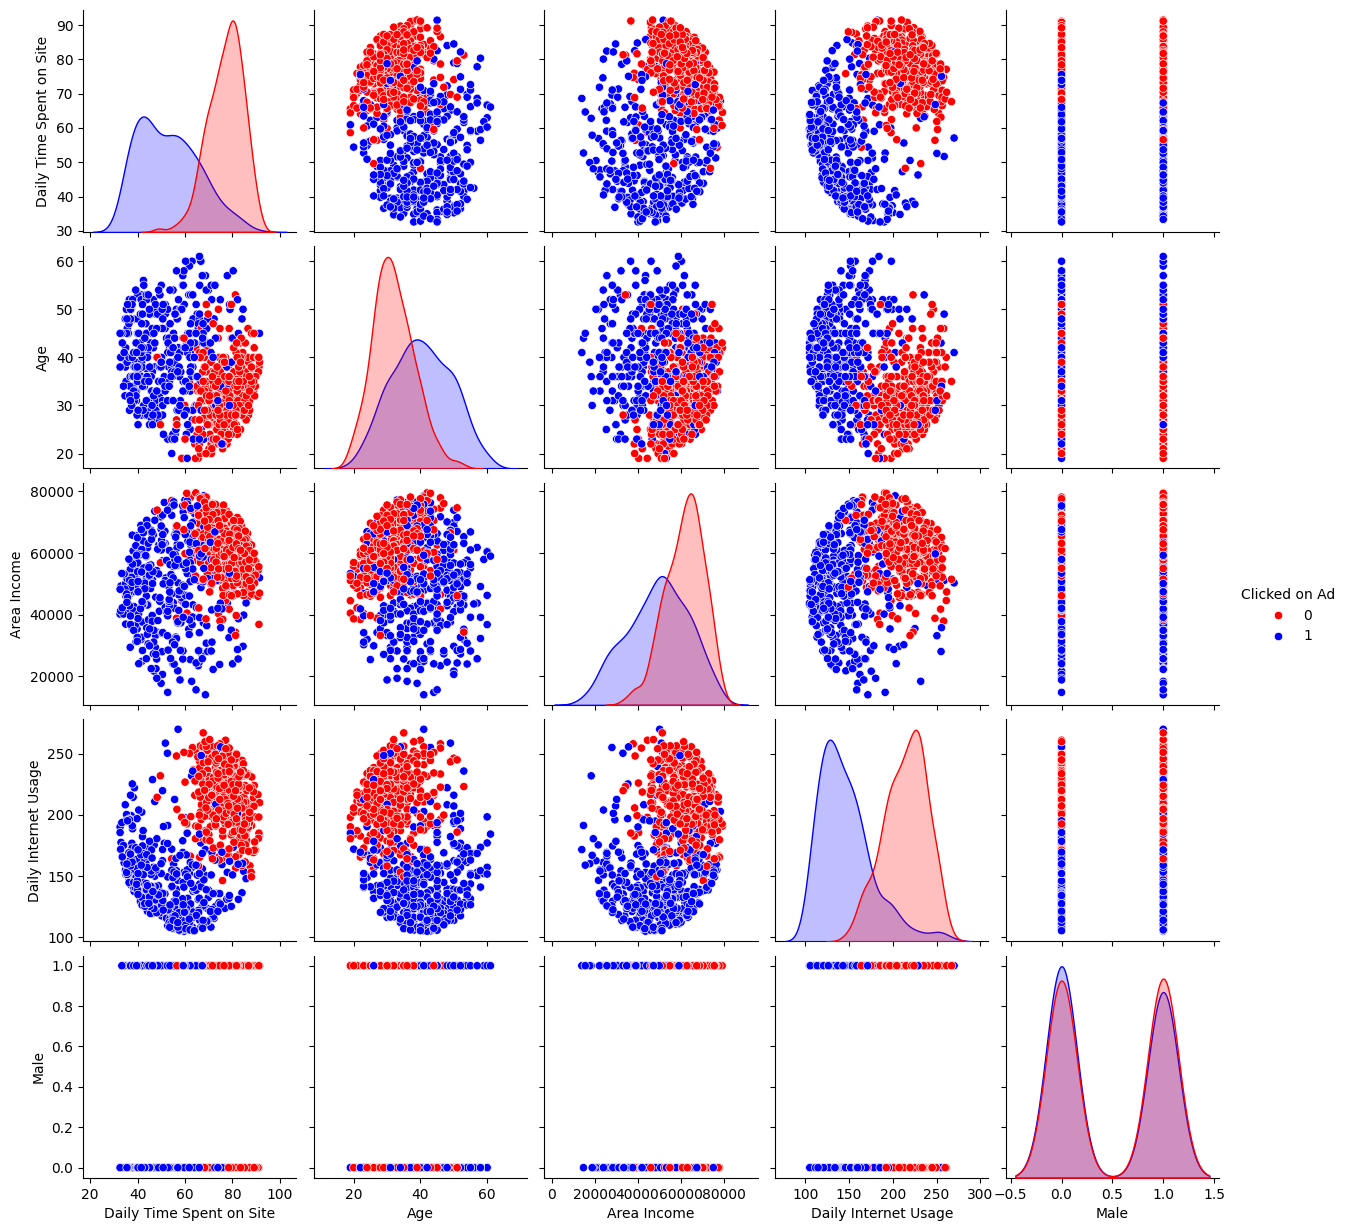

In [30]:
# Unir X_train con y_train para incluir la variable objetivo en el análisis
train_data = X_train.copy()
train_data['Clicked on Ad'] = y_train

# Crear el PairPlot con código de color basado en la variable target
sns.pairplot(train_data, hue='Clicked on Ad', palette=['red', 'blue'])

# Mostrar el gráfico
plt.show()

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selección de features:

📌 Selección de Features basada en el PairPlot:
- Daily Time Spent on Site → Parece mostrar diferencias entre los grupos, lo que sugiere que el tiempo de permanencia en la web influye en la probabilidad de hacer clic.
- Age → Hay una separación notable entre edades, lo que indica que la edad podría ser un factor importante en la decisión de pulsar o no el anuncio.
- Daily Internet Usage → Se observan patrones distintos entre usuarios con más o menos uso diario de internet, lo que podría afectar la interacción con anuncios.
- Area Income → Aunque menos evidente, hay cierta variabilidad que podría influir en la probabilidad de hacer clic dependiendo del nivel de ingresos.
📊 Variables seleccionadas para el modelo:
✔ "Daily Time Spent on Site"
✔ "Age"
✔ "Daily Internet Usage"
✔ "Area Income"

